# Binary class classification using cat and dog data set

In [1]:
import os, shutil

In [2]:
# Directory with origional data Set
original_dataset_dir = 'C:/Users/asif1/Git/Deep_Learning/DATA/cat_dog/train'
original_dataset_dir

'C:/Users/asif1/Git/Deep_Learning/DATA/cat_dog/train'

In [3]:
# Directory with smaller data Set
base_dir = 'C:/Users/asif1/Git/Deep_Learning/DATA/cat_dog_small'
os.mkdir(base_dir)

In [4]:
# Directories for Training, Validation, Test splits

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#Directory with test cat pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
# Dividing the cat data  in test, train and validation sets
fnames = ['cat.{}.jpg'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(500, 750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(750, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# Dividing the dog data  in test, train and validation sets
fnames = ['dog.{}.jpg'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(500, 750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(750, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 500
total training dog images: 500
total validation cat images: 250
total validation dog images: 250
total test cat images: 250
total test dog images: 250


In [12]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                                            train_dir,
                                            target_size=(150, 150),
                                            batch_size=10,
                                            class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                                            validation_dir,
                                            target_size=(150, 150),
                                            batch_size=10,
                                            class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [20]:
history = model.fit_generator(
                            train_generator,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=validation_generator,
                            validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 66s 639ms/step - loss: 0.7004 - acc: 0.5081 - val_loss: 0.6853 - val_acc: 0.5100
Epoch 2/30
100/100 [==============================] - 74s 737ms/step - loss: 0.6770 - acc: 0.5749 - val_loss: 0.6881 - val_acc: 0.5480
Epoch 3/30
100/100 [==============================] - 76s 765ms/step - loss: 0.6333 - acc: 0.6522 - val_loss: 0.6109 - val_acc: 0.6780
Epoch 4/30
100/100 [==============================] - 83s 833ms/step - loss: 0.5639 - acc: 0.6863 - val_loss: 0.5879 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 79s 792ms/step - loss: 0.5457 - acc: 0.7338 - val_loss: 0.5737 - val_acc: 0.7100
Epoch 6/30
100/100 [==============================] - 78s 783ms/step - loss: 0.5212 - acc: 0.7433 - val_loss: 0.5884 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 80s 797ms/step - loss: 0.4852 - acc: 0.7730 - val_loss: 0.6339 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 8

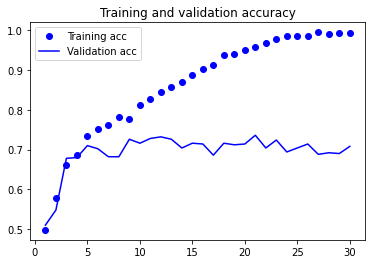

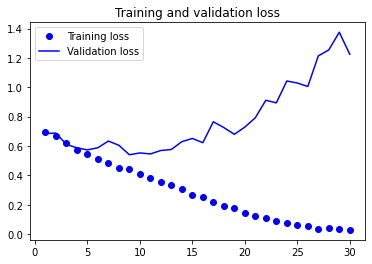

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

In [1]:
# is clear from the graph that the model starts to overfit approx after 5th epoch
#now using Dropout and Data Augmentation Technique

In [13]:
datagen = ImageDataGenerator(
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

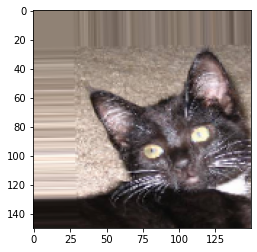

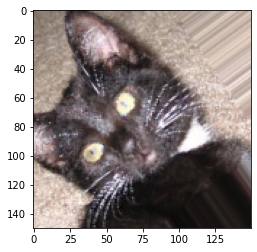

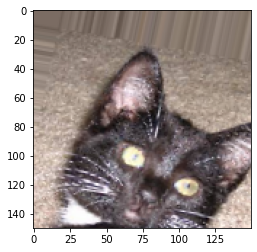

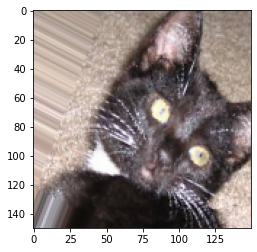

In [17]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[5]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [20]:
from keras import layers
from keras import models,optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')
history = model.fit(
                    train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 77s 770ms/step - loss: 0.6900 - acc: 0.5370 - val_loss: 0.6845 - val_acc: 0.5580
Epoch 2/30
100/100 [==============================] - 91s 907ms/step - loss: 0.6863 - acc: 0.5610 - val_loss: 0.6680 - val_acc: 0.6000
Epoch 3/30
100/100 [==============================] - 96s 961ms/step - loss: 0.6737 - acc: 0.5880 - val_loss: 0.6934 - val_acc: 0.5460
Epoch 4/30
100/100 [==============================] - 93s 926ms/step - loss: 0.6649 - acc: 0.5970 - val_loss: 0.7008 - val_acc: 0.5400
Epoch 5/30
100/100 [==============================] - 96s 958ms/step - loss: 0.6543 - acc: 0.6160 - val_loss: 0.6468 - val_acc: 0.6280
Epoch 6/30
100/100 [==============================] - 90s 905ms/step - loss: 0.6480 - acc: 0.6310 - val_loss: 0.6420 - val_acc: 0.6360
Epoch 7/30
100/100 [==============================] - 100s 1s/step - loss: 0.6473 - acc: 0.6230 - val_loss:

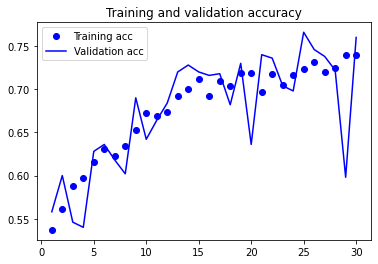

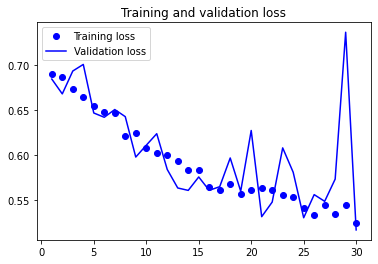

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

In [1]:
import os, shutil

original_dataset_dir = 'C:/Users/asif1/Git/Deep_Learning/DATA/fruit_dataset/train'

base_dir = 'C:/Users/asif1/Git/Deep_Learning/DATA/fruit_dataset/fruits'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [2]:
train_apple_dir = os.path.join(train_dir, 'apple')
os.mkdir(train_apple_dir)
train_orange_dir = os.path.join(train_dir, 'orange')
os.mkdir(train_orange_dir)

validation_apple_dir = os.path.join(validation_dir, 'apple')
os.mkdir(validation_apple_dir)
validation_orange_dir = os.path.join(validation_dir, 'orange')
os.mkdir(validation_orange_dir)

test_apple_dir = os.path.join(test_dir, 'apple')
os.mkdir(test_apple_dir)
test_orange_dir = os.path.join(test_dir, 'orange')
os.mkdir(test_orange_dir)


In [7]:
fnames = ['apple_{}.jpg'.format(i) for i in range(1,56)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_apple_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['apple_{}.jpg'.format(i) for i in range(56, 76)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_apple_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['apple_{}.jpg'.format(i) for i in range(76, 96)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_apple_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['orange_{}.jpg'.format(i) for i in range(1,56)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_orange_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['orange_{}.jpg'.format(i) for i in range(56, 76)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_orange_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['orange_{}.jpg'.format(i) for i in range(76, 96)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_orange_dir, fname)
    shutil.copyfile(src, dst)


In [9]:
print('total training apple images:', len(os.listdir(train_apple_dir)))

print('total training orange images:', len(os.listdir(train_orange_dir)))

print('total validation apple images:', len(os.listdir(validation_apple_dir)))

print('total validation orange images:', len(os.listdir(validation_orange_dir)))

print('total test apple images:', len(os.listdir(test_apple_dir)))

print('total test orange images:', len(os.listdir(test_orange_dir)))


total training apple images: 55
total training orange images: 55
total validation apple images: 26
total validation orange images: 26
total test apple images: 21
total test orange images: 21


In [18]:
from keras import layers
from keras import models,optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 256)      

In [30]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
                                    train_dir,
                                    target_size=(150, 150),
                                    batch_size=15,
                                    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
                                    validation_dir,
                                    target_size=(150, 150),
                                    batch_size=15,
                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(
                                    test_dir,
                                    target_size=(150, 150),
                                    batch_size=15,
                                    class_mode='binary')



Found 110 images belonging to 2 classes.
Found 52 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [31]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)


In [50]:
history = model.fit(
                    train_generator,
                    epochs=20,
                    validation_data=validation_generator)

Epoch 1/20
1/8 [==>...........................] - ETA: 8s - loss: 0.0090 - acc: 1.0000

C:\Users\asif1\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - 9s 1s/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 0.0683 - acc: 0.9455 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: 0.0227 - acc: 0.9909 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 5/20
8/8 [==============================] - 10s 1s/step - loss: 0.0067 - acc: 1.0000 - val_loss: 6.0351e-04 - val_acc: 1.0000
Epoch 6/20
8/8 [==============================] - 10s 1s/step - loss: 0.0031 - acc: 1.0000 - val_loss: 5.8301e-04 - val_acc: 1.0000
Epoch 7/20
8/8 [==============================] - 11s 1s/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.6064e-04 - val_acc: 1.0000
Epoch 8/20
8/8 [==============================] - 11s 1s/step - loss: 0.1165 - acc: 0.9545 - val_loss: 0.00

In [33]:
model.save('apple_and_orange_1.h5')

In [51]:
model.save('apple_and_orange_2.h5')

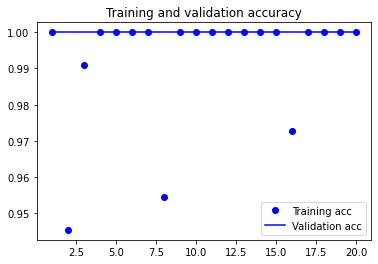

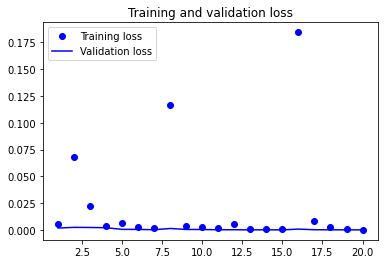

In [52]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

In [75]:
test_generator = test_datagen.flow_from_directory(
                                    train_dir,
                                    target_size=(150, 150),
                                    batch_size=1,
                                    class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 110 images belonging to 2 classes.
110/110 [==============================] - 3s 29ms/step - loss: 1.4538e-04 - acc: 1.0000
test acc: 1.0


In [76]:
train_zip_dir = 'C:/Users/asif1/Git/Deep_Learning/DATA/fruit_dataset/train_zip'

In [77]:
test_generator = test_datagen.flow_from_directory(
                                    train_zip_dir,
                                    target_size=(150, 150),
                                    batch_size=1,
                                    class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 240 images belonging to 1 classes.
240/240 [==============================] - 8s 33ms/step - loss: 5.6469 - acc: 0.3708
test acc: 0.3708333373069763
